In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import spacy

In [3]:
root_path = '../Data_Files/'
data = pd.read_csv(root_path + 'hotels_reviews.csv')

In [4]:
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.username,sourceURLs,websites,language,reviews.clean_text,userCity_upper,userProvince_upper,is_state,user_country,ratingCategory
0,AVwc252WIN2L1WUfpqLP,2016-10-30 21:42:42,2018-09-10 21:06:27,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,Language.ENGLISH,experience rancho valencia absolutely perfect ...,UNKNOWN,UNKNOWN,0,UNKNOWN,2.0
1,AVwc252WIN2L1WUfpqLP,2016-10-30 21:42:42,2018-09-10 21:06:27,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,Language.ENGLISH,amazing place everyone extremely warm welcomin...,UNKNOWN,UNKNOWN,0,UNKNOWN,2.0
2,AVwc252WIN2L1WUfpqLP,2016-10-30 21:42:42,2018-09-10 21:06:27,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,Language.ENGLISH,book 3 night stay rancho valencia play tennis ...,UNKNOWN,UNKNOWN,0,UNKNOWN,2.0
3,AVwdOclqIN2L1WUfti38,2015-11-28 19:19:35,2018-09-10 21:06:16,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,Language.ENGLISH,currently bed write past hr 1/2 dog bark squea...,RICHMOND,VIRGINIA,1,UNITEDSTATES,0.0
4,AVwdOclqIN2L1WUfti38,2015-11-28 19:19:35,2018-09-10 21:06:16,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,Language.ENGLISH,live md aloft home away home stay 1 night 7716...,LAUREL,MARYLAND,1,UNITEDSTATES,2.0


# Word Cloud

In [ ]:
reviews_cat_zero = data[data['ratingCategory'] == 0]['reviews.clean_text']
print("Number of reviews in rating category 0:", len(reviews_cat_zero))
reviews_cat_one = data[data['ratingCategory'] == 1]['reviews.clean_text']
print("Number of reviews in rating category 1:", len(reviews_cat_one))
reviews_cat_two = data[data['ratingCategory'] == 2]['reviews.clean_text']
print("Number of reviews in rating category 2:", len(reviews_cat_two))

Number of reviews in rating category 0: 2338
Number of reviews in rating category 1: 7788
Number of reviews in rating category 2: 9575


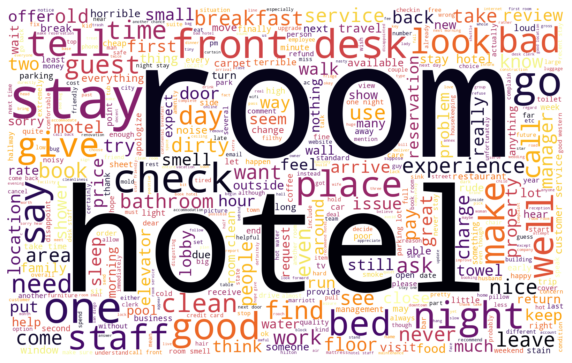

In [ ]:
plt.figure(figsize = (10,10))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 1000, colormap='inferno',
               background_color='white').generate(" ".join(reviews_cat_zero))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

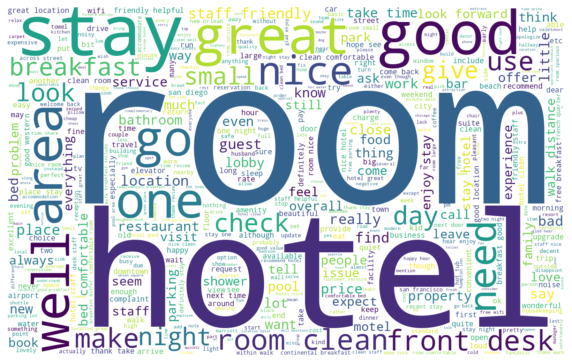

In [ ]:
plt.figure(figsize = (10,10))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 1000,
               background_color='white').generate(" ".join(reviews_cat_one))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

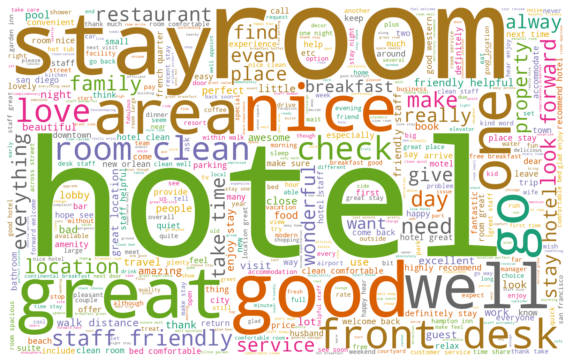

In [ ]:
plt.figure(figsize = (10,10))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 1000, colormap='Dark2',
               background_color='white').generate(" ".join(reviews_cat_two))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

From the word clouds above, there are some common words such as  ['hotel', 'room', 'stay', 'place'] which do not value add to the analysis. Hence, we will remove these common words to gain deeper insights.

In [ ]:
common_words = ['hotel', 'room', 'stay', 'place']

def remove_common_words(text, common_words):
  for word in common_words:
    text = text.replace(word, "")
  return text

data['reviews.no_common_words_text'] = data['reviews.clean_text'].apply(lambda x: remove_common_words(x, common_words))

In [ ]:
reviews_cat_zero = data[data['ratingCategory'] == 0]['reviews.no_common_words_text']
reviews_cat_one = data[data['ratingCategory'] == 1]['reviews.no_common_words_text']
reviews_cat_two = data[data['ratingCategory'] == 2]['reviews.no_common_words_text']

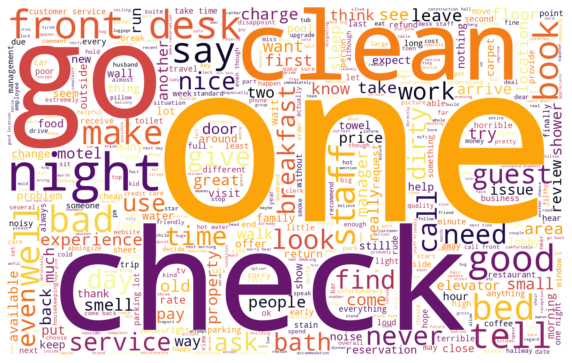

In [ ]:
plt.figure(figsize = (10,10))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 1000, colormap='inferno',
               background_color='white').generate(" ".join(reviews_cat_zero))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

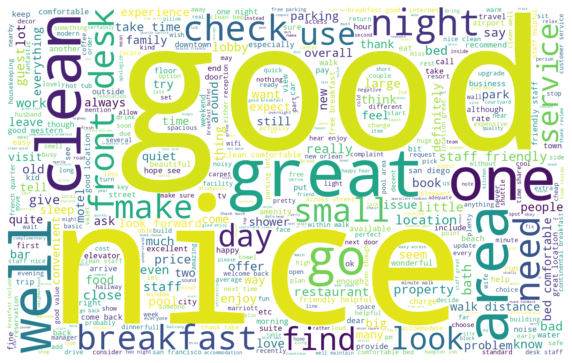

In [ ]:
plt.figure(figsize = (10,10))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 1000,
               background_color='white').generate(" ".join(reviews_cat_one))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

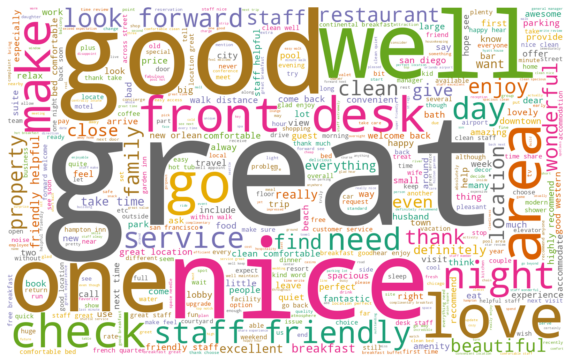

In [ ]:
plt.figure(figsize = (10,10))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 1000, colormap='Dark2',
               background_color='white').generate(" ".join(reviews_cat_two))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

# Named Entity Recognition (NER)

In [4]:
NER = spacy.load("en_core_web_sm")

reviews_cat_zero = data[data['ratingCategory'] == 0]['reviews.clean_text']
reviews_cat_one = data[data['ratingCategory'] == 1]['reviews.clean_text']
reviews_cat_two = data[data['ratingCategory'] == 2]['reviews.clean_text']

# Combine all reviews into a list for each category
all_sentences_cat_zero = []
all_sentences_cat_one = []
all_sentences_cat_two = []

for r in reviews_cat_zero:
    all_sentences_cat_zero.append(r)
for r in reviews_cat_one:
    all_sentences_cat_one.append(r)
for r in reviews_cat_two:
    all_sentences_cat_two.append(r)

def label_entity(df, text):
  generator = NER(text)
  for word in generator.ents:
    row = pd.DataFrame([[word.text, word.label_]], columns=['Word', 'Entity'])
    df = pd.concat([df, row], ignore_index=True)
  return df

In [5]:
ner_df_zero = pd.DataFrame(columns=['Word', 'Entity'])

for sentence in all_sentences_cat_zero:
  ner_df_zero = label_entity(ner_df_zero, sentence)

ner_df_zero

,Word,Entity
0,1/2,CARDINAL
1,315.00,CARDINAL
2,eastern,ORG
3,50,CARDINAL
4,250 day year,DATE
...,...,...
6605,tony keathley,PERSON
6606,3,CARDINAL
6607,day,DATE
6608,1 2 day,DATE


In [6]:
ner_df_one = pd.DataFrame(columns=['Word', 'Entity'])

for sentence in all_sentences_cat_one:
  ner_df_one = label_entity(ner_df_one, sentence)

ner_df_one

,Word,Entity
0,second,ORDINAL
1,one night,TIME
2,san francisco,GPE
3,4,CARDINAL
4,4,CARDINAL
...,...,...
18328,sunday,DATE
18329,7,CARDINAL
18330,2,CARDINAL
18331,northeast,LOC


In [7]:
ner_df_two = pd.DataFrame(columns=['Word', 'Entity'])

for sentence in all_sentences_cat_two:
  ner_df_two = label_entity(ner_df_two, sentence)

ner_df_two

,Word,Entity
0,2,CARDINAL
1,3 night,TIME
2,one,CARDINAL
3,america,GPE
4,morning,TIME
...,...,...
19021,90 year old,DATE
19022,morning,TIME
19023,three night,TIME
19024,virginia beach,GPE


In [ ]:
# Types of entity
print('Entities in reviews with category 0 ratings:', ner_df_zero['Entity'].unique())
print('Entities in reviews with category 1 ratings:', ner_df_one['Entity'].unique())
print('Entities in reviews with category 2 ratings:', ner_df_two['Entity'].unique())

Entities in reviews with category 0 ratings: ['CARDINAL' 'ORG' 'DATE' 'QUANTITY' 'GPE' 'TIME' 'MONEY' 'ORDINAL'
 'PERSON' 'NORP' 'PRODUCT' 'FAC' 'LOC' 'LANGUAGE' 'LAW' 'EVENT' 'PERCENT'
 'WORK_OF_ART']
Entities in reviews with category 1 ratings: ['ORDINAL' 'TIME' 'GPE' 'CARDINAL' 'QUANTITY' 'NORP' 'PERSON' 'DATE' 'ORG'
 'FAC' 'MONEY' 'PRODUCT' 'LOC' 'LANGUAGE' 'WORK_OF_ART' 'PERCENT' 'EVENT'
 'LAW']
Entities in reviews with category 2 ratings: ['CARDINAL' 'TIME' 'GPE' 'PRODUCT' 'NORP' 'DATE' 'ORDINAL' 'ORG' 'PERSON'
 'QUANTITY' 'LOC' 'EVENT' 'FAC' 'MONEY' 'PERCENT' 'LANGUAGE' 'LAW'
 'WORK_OF_ART']


In [ ]:
spacy.explain('QUANTITY')

'Measurements, as of weight or distance'

In [8]:
def get_top_10_values(df, entity, category_num):
  new_df = df[df['Entity'] == entity]
  new_df = new_df['Word'].value_counts()
  new_df = new_df[:10]
  column_name = 'cat_' + str(category_num)
  new_df = pd.DataFrame(new_df).reset_index().rename(columns={'Word': column_name})
  return new_df

## Entity GPE = Countries, cities, states

In [ ]:
all_df = [ner_df_zero, ner_df_one, ner_df_two]

GPE_all = pd.DataFrame(columns = {'index'})

for i in range(len(all_df)):
  GPE = get_top_10_values(all_df[i], 'GPE', i)
  GPE_all = GPE_all.merge(GPE, on='index', how='outer')

GPE_all = GPE_all.fillna(0)

In [ ]:
GPE_all

,index,cat_0,cat_1,cat_2
0,atlanta,38.0,169.0,191.0
1,san diego,36.0,261.0,251.0
2,san francisco,34.0,164.0,185.0
3,chicago,24.0,134.0,250.0
4,new orleans,22.0,157.0,272.0
5,orlando,21.0,73.0,104.0
6,florida,8.0,40.0,59.0
7,las vegas,7.0,0.0,0.0
8,boston,7.0,0.0,0.0
9,virginia,6.0,0.0,0.0


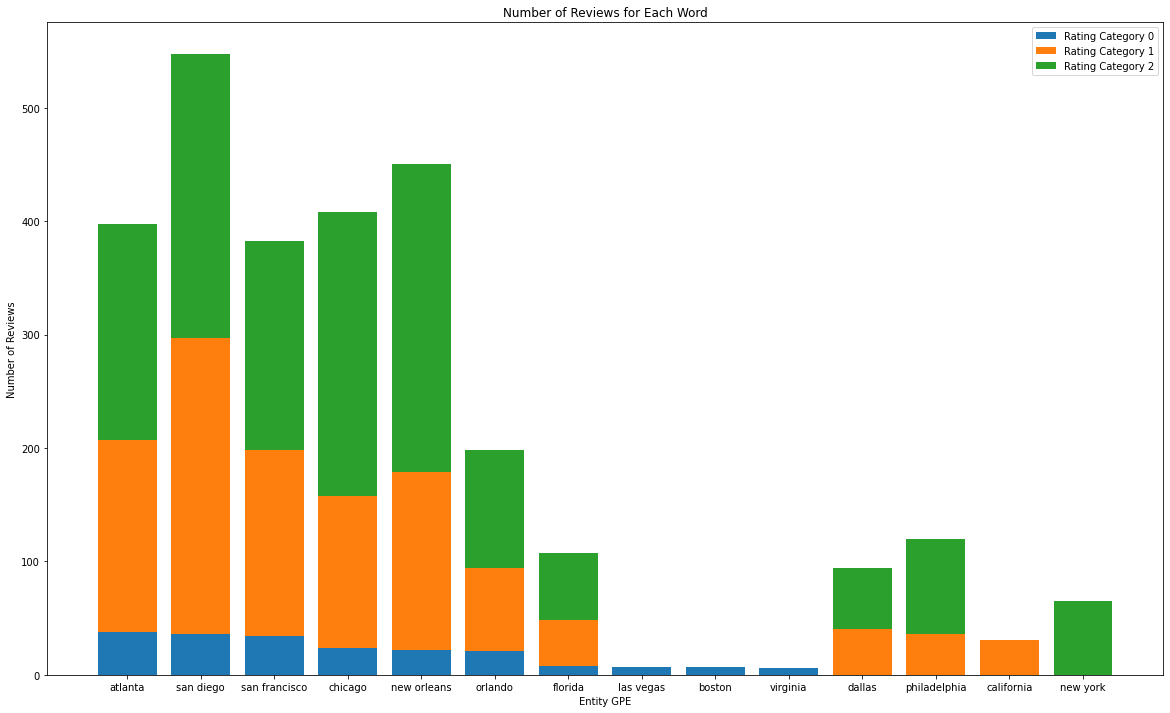

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))

ax.bar(GPE_all['index'], GPE_all['cat_0'], label="Rating Category 0")
ax.bar(GPE_all['index'], GPE_all['cat_1'], bottom = GPE_all['cat_0'], label="Rating Category 1")
ax.bar(GPE_all['index'], GPE_all['cat_2'], bottom = GPE_all['cat_0'] +  GPE_all['cat_1'], label="Rating Category 2")

ax.set_xlabel("Entity GPE")
ax.set_ylabel("Number of Reviews")
ax.set_title("Number of Reviews for Each Word")
ax.legend()

plt.show()

In [ ]:
GPE_all_2 = GPE_all.copy()

for i in range(len(GPE_all_2)):
    row_sum = GPE_all.loc[i, ['cat_0','cat_1', 'cat_2']].sum()
    GPE_all_2.loc[i, 'cat_0'] = GPE_all_2.loc[i, 'cat_0'] / row_sum * 100
    GPE_all_2.loc[i, 'cat_1'] = GPE_all_2.loc[i, 'cat_1'] / row_sum * 100
    GPE_all_2.loc[i, 'cat_2'] = GPE_all_2.loc[i, 'cat_2'] / row_sum * 100

In [ ]:
GPE_all_2

,index,cat_0,cat_1,cat_2
0,atlanta,9.547739,42.462312,47.989950
1,san diego,6.569343,47.627737,45.802920
2,san francisco,8.877285,42.819843,48.302872
3,chicago,5.882353,32.843137,61.274510
4,new orleans,4.878049,34.811530,60.310421
5,orlando,10.606061,36.868687,52.525253
6,florida,7.476636,37.383178,55.140187
7,las vegas,100.000000,0.000000,0.000000
8,boston,100.000000,0.000000,0.000000
9,virginia,100.000000,0.000000,0.000000


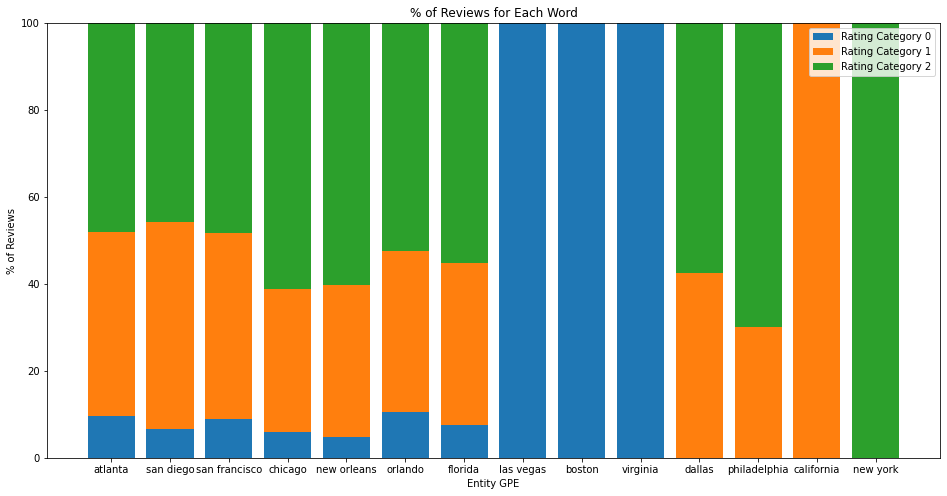

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.bar(GPE_all_2['index'], GPE_all_2['cat_0'], label="Rating Category 0")
ax.bar(GPE_all_2['index'], GPE_all_2['cat_1'], bottom = GPE_all_2['cat_0'], label="Rating Category 1")
ax.bar(GPE_all_2['index'], GPE_all_2['cat_2'], bottom = GPE_all_2['cat_0'] + GPE_all_2['cat_1'], label="Rating Category 2")

ax.set_xlabel("Entity GPE")
ax.set_ylabel("% of Reviews")
ax.set_title("% of Reviews for Each Word")
ax.legend()

plt.show()

## Entity MONEY = Monetary values, including unit

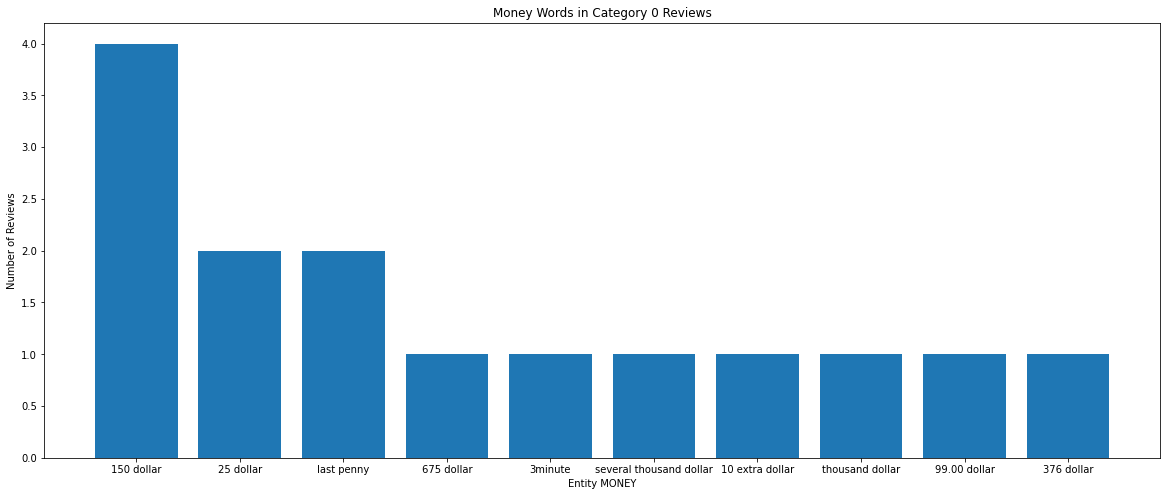

In [ ]:
money_zero = get_top_10_values(ner_df_zero, 'MONEY', 0)

fig, ax = plt.subplots(figsize=(20,8))

ax.bar(money_zero['index'], money_zero['cat_0'])

ax.set_xlabel("Entity MONEY")
ax.set_ylabel("Number of Reviews")
ax.set_title("Money Words in Category 0 Reviews")

plt.show()

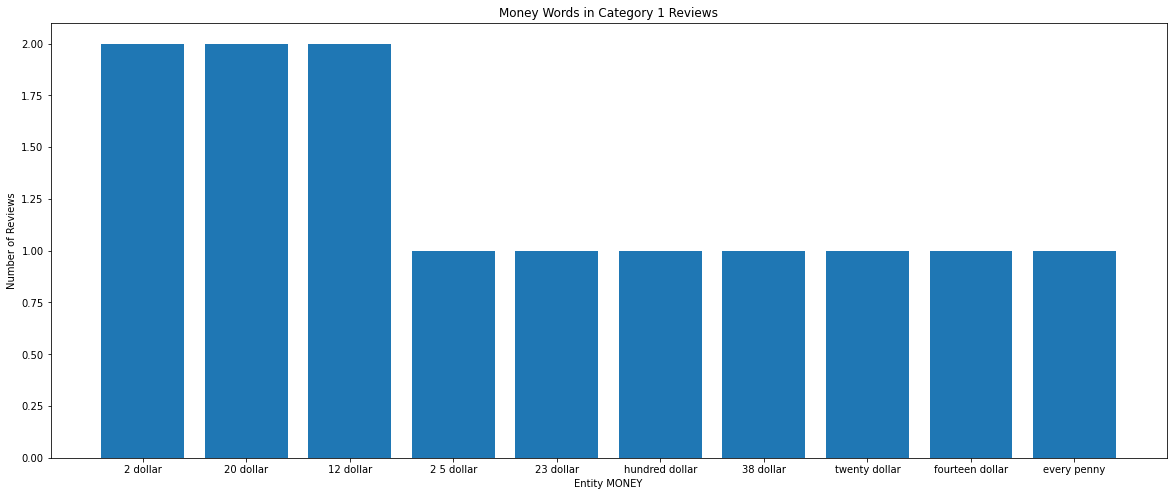

In [ ]:
money_one = get_top_10_values(ner_df_one, 'MONEY', 1)

fig, ax = plt.subplots(figsize=(20,8))

ax.bar(money_one['index'], money_one['cat_1'])

ax.set_xlabel("Entity MONEY")
ax.set_ylabel("Number of Reviews")
ax.set_title("Money Words in Category 1 Reviews")

plt.show()

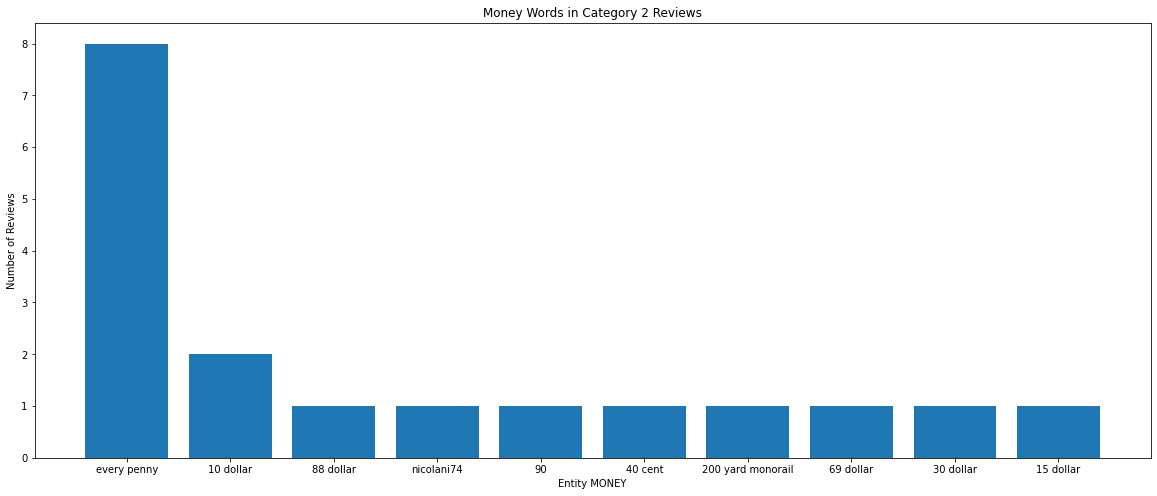

In [ ]:
money_two = get_top_10_values(ner_df_two, 'MONEY', 2)

fig, ax = plt.subplots(figsize=(20,8))

ax.bar(money_two['index'], money_two['cat_2'])

ax.set_xlabel("Entity MONEY")
ax.set_ylabel("Number of Reviews")
ax.set_title("Money Words in Category 2 Reviews")

plt.show()

## Entity FAC = Buildings, airports, highways, bridges, etc.

In [9]:
all_df = [ner_df_zero, ner_df_one, ner_df_two]

FAC_all = pd.DataFrame(columns = {'index'})

for i in range(len(all_df)):
  FAC = get_top_10_values(all_df[i], 'FAC', i)
  FAC_all = FAC_all.merge(FAC, on='index', how='outer')

FAC_all = FAC_all.fillna(0)

In [10]:
FAC_all

,index,cat_0,cat_1,cat_2
0,metro,3.0,79.0,41.0
1,hotel abri,2.0,0.0,0.0
2,octavia margineanstregis,1.0,0.0,0.0
3,nob hill hotel,1.0,0.0,0.0
4,cruise alaska,1.0,0.0,0.0
5,galleria park hotel,1.0,4.0,6.0
6,72nd street subway,1.0,0.0,0.0
7,night street,1.0,0.0,0.0
8,hotel ton,1.0,0.0,0.0
9,orlando airport,1.0,4.0,11.0


In [11]:
FAC_all_2 = FAC_all.copy()

for i in range(len(FAC_all_2)):
    row_sum = FAC_all.loc[i, ['cat_0','cat_1', 'cat_2']].sum()
    FAC_all_2.loc[i, 'cat_0'] = FAC_all_2.loc[i, 'cat_0'] / row_sum * 100
    FAC_all_2.loc[i, 'cat_1'] = FAC_all_2.loc[i, 'cat_1'] / row_sum * 100
    FAC_all_2.loc[i, 'cat_2'] = FAC_all_2.loc[i, 'cat_2'] / row_sum * 100

In [12]:
FAC_all_2

,index,cat_0,cat_1,cat_2
0,metro,2.439024,64.227642,33.333333
1,hotel abri,100.000000,0.000000,0.000000
2,octavia margineanstregis,100.000000,0.000000,0.000000
3,nob hill hotel,100.000000,0.000000,0.000000
4,cruise alaska,100.000000,0.000000,0.000000
5,galleria park hotel,9.090909,36.363636,54.545455
6,72nd street subway,100.000000,0.000000,0.000000
7,night street,100.000000,0.000000,0.000000
8,hotel ton,100.000000,0.000000,0.000000
9,orlando airport,6.250000,25.000000,68.750000


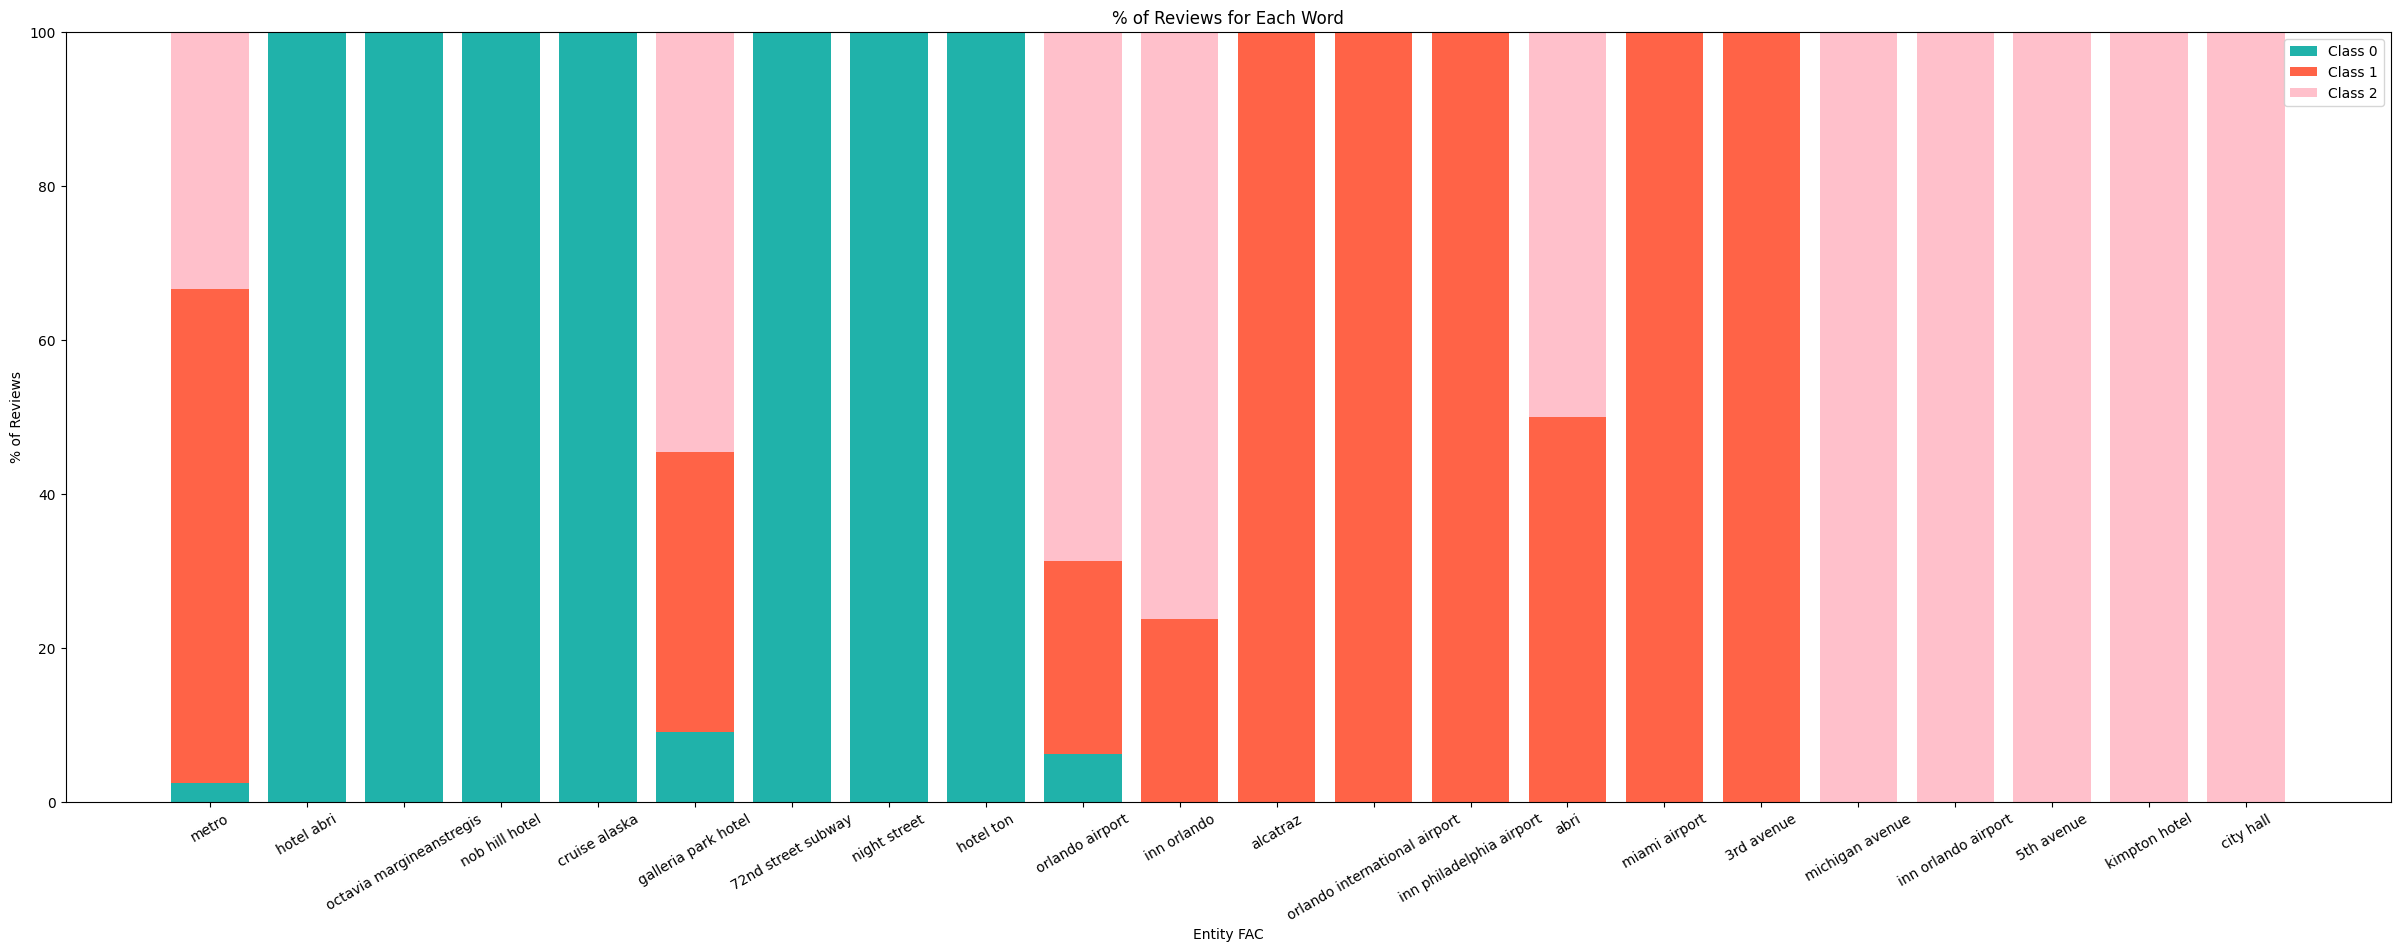

In [13]:
fig, ax = plt.subplots(figsize=(30,10))

ax.bar(FAC_all_2['index'], FAC_all_2['cat_0'], label="Class 0", color = "lightseagreen")
ax.bar(FAC_all_2['index'], FAC_all_2['cat_1'], bottom = FAC_all_2['cat_0'], label="Class 1", color = "tomato")
ax.bar(FAC_all_2['index'], FAC_all_2['cat_2'], bottom = FAC_all_2['cat_0'] + FAC_all_2['cat_1'], label="Class 2", color = "pink")

ax.set_xlabel("Entity FAC")
plt.xticks(rotation=30)
ax.set_ylabel("% of Reviews")
ax.set_title("% of Reviews for Each Word")
ax.legend()

plt.show()

## Entity ORG = Companies, agencies, institutions, etc.

In [ ]:
all_df = [ner_df_zero, ner_df_one, ner_df_two]

ORG_all = pd.DataFrame(columns = {'index'})

for i in range(len(all_df)):
  ORG = get_top_10_values(all_df[i], 'ORG', i)
  ORG_all = ORG_all.merge(ORG, on='index', how='outer')

ORG_all = ORG_all.fillna(0)

In [ ]:
ORG_all

,index,cat_0,cat_1,cat_2
0,hotel,19.0,30.0,38.0
1,gm,15.0,15.0,19.0
2,ac,11.0,16.0,0.0
3,inn express,6.0,24.0,22.0
4,amex,5.0,0.0,0.0
5,marriott reward,5.0,8.0,0.0
6,ga,5.0,0.0,0.0
7,ritz,3.0,9.0,21.0
8,430pm,3.0,0.0,0.0
9,ada,3.0,0.0,0.0


In [ ]:
ORG_all_2 = ORG_all.copy()

for i in range(len(ORG_all_2)):
    row_sum = ORG_all_2.loc[i, ['cat_0','cat_1', 'cat_2']].sum()
    ORG_all_2.loc[i, 'cat_0'] = ORG_all_2.loc[i, 'cat_0'] / row_sum * 100
    ORG_all_2.loc[i, 'cat_1'] = ORG_all_2.loc[i, 'cat_1'] / row_sum * 100
    ORG_all_2.loc[i, 'cat_2'] = ORG_all_2.loc[i, 'cat_2'] / row_sum * 100

In [ ]:
ORG_all_2

,index,cat_0,cat_1,cat_2
0,hotel,21.839080,34.482759,43.678161
1,gm,30.612245,30.612245,38.775510
2,ac,40.740741,59.259259,0.000000
3,inn express,11.538462,46.153846,42.307692
4,amex,100.000000,0.000000,0.000000
5,marriott reward,38.461538,61.538462,0.000000
6,ga,100.000000,0.000000,0.000000
7,ritz,9.090909,27.272727,63.636364
8,430pm,100.000000,0.000000,0.000000
9,ada,100.000000,0.000000,0.000000


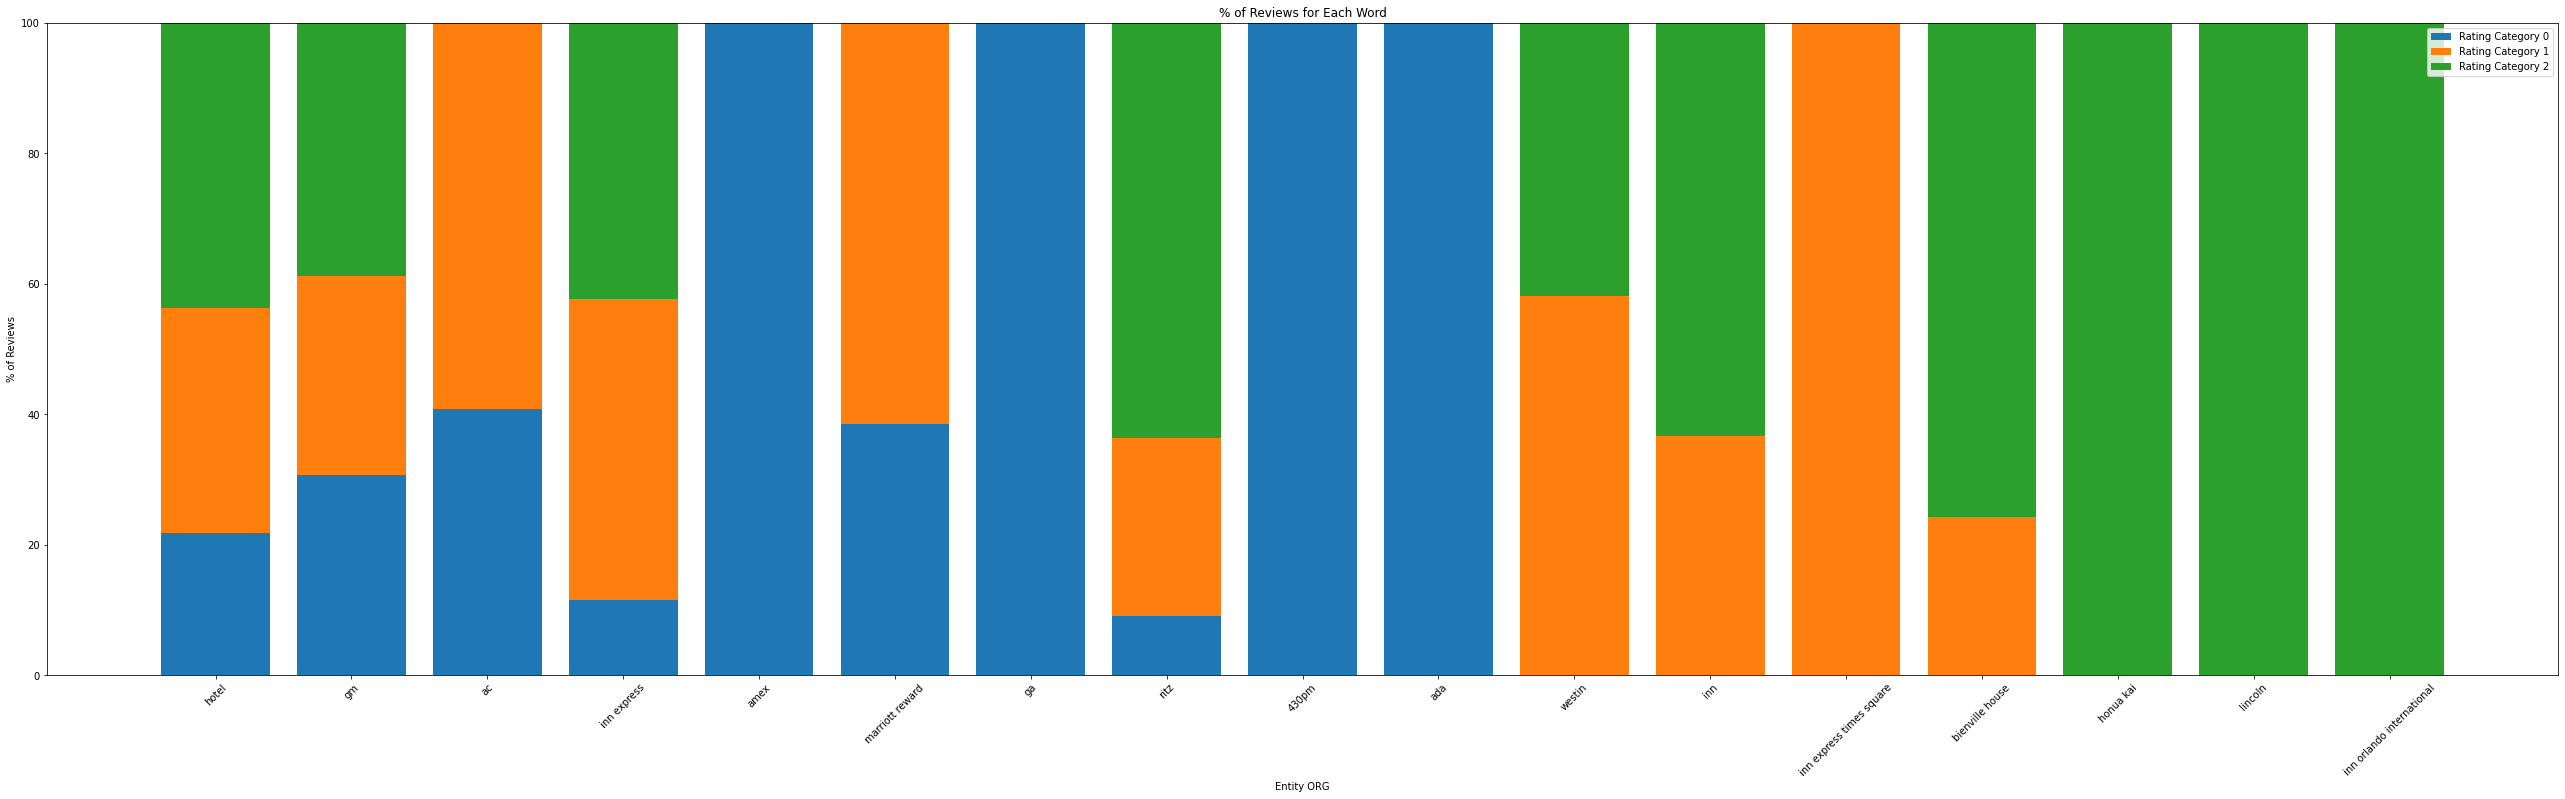

In [ ]:
fig, ax = plt.subplots(figsize=(45,12))

ax.bar(ORG_all_2['index'], ORG_all_2['cat_0'], label="Rating Category 0")
ax.bar(ORG_all_2['index'], ORG_all_2['cat_1'], bottom = ORG_all_2['cat_0'], label="Rating Category 1")
ax.bar(ORG_all_2['index'], ORG_all_2['cat_2'], bottom = ORG_all_2['cat_0'] + ORG_all_2['cat_1'], label="Rating Category 2")

ax.set_xlabel("Entity ORG")
plt.xticks(rotation=45)
ax.set_ylabel("% of Reviews")
ax.set_title("% of Reviews for Each Word")
ax.legend()

plt.show()

## Entity QUANTITY = Measurements, as of weight or distance

In [ ]:
all_df = [ner_df_zero, ner_df_one, ner_df_two]

QTY_all = pd.DataFrame(columns = {'index'})

for i in range(len(all_df)):
  QTY = get_top_10_values(all_df[i], 'QUANTITY', i)
  QTY_all = QTY_all.merge(QTY, on='index', how='outer')

QTY_all = QTY_all.fillna(0)

In [ ]:
QTY_all

,index,cat_0,cat_1,cat_2
0,1 mile,8.0,15.0,9.0
1,2 mile,3.0,10.0,8.0
2,5 mile,2.0,6.0,10.0
3,2 night,2.0,4.0,3.0
4,3 mile,2.0,7.0,10.0
5,60 degree,2.0,0.0,0.0
6,300 one night,1.0,0.0,0.0
7,100.00 2 hour,1.0,0.0,0.0
8,316.00 one night,1.0,0.0,0.0
9,1.2 mile,1.0,0.0,0.0


In [ ]:
QTY_all_2 = QTY_all.copy()

for i in range(len(QTY_all_2)):
    row_sum = QTY_all_2.loc[i, ['cat_0','cat_1', 'cat_2']].sum()
    QTY_all_2.loc[i, 'cat_0'] = QTY_all_2.loc[i, 'cat_0'] / row_sum * 100
    QTY_all_2.loc[i, 'cat_1'] = QTY_all_2.loc[i, 'cat_1'] / row_sum * 100
    QTY_all_2.loc[i, 'cat_2'] = QTY_all_2.loc[i, 'cat_2'] / row_sum * 100

In [ ]:
QTY_all_2

,index,cat_0,cat_1,cat_2
0,1 mile,25.000000,46.875000,28.125000
1,2 mile,14.285714,47.619048,38.095238
2,5 mile,11.111111,33.333333,55.555556
3,2 night,22.222222,44.444444,33.333333
4,3 mile,10.526316,36.842105,52.631579
5,60 degree,100.000000,0.000000,0.000000
6,300 one night,100.000000,0.000000,0.000000
7,100.00 2 hour,100.000000,0.000000,0.000000
8,316.00 one night,100.000000,0.000000,0.000000
9,1.2 mile,100.000000,0.000000,0.000000


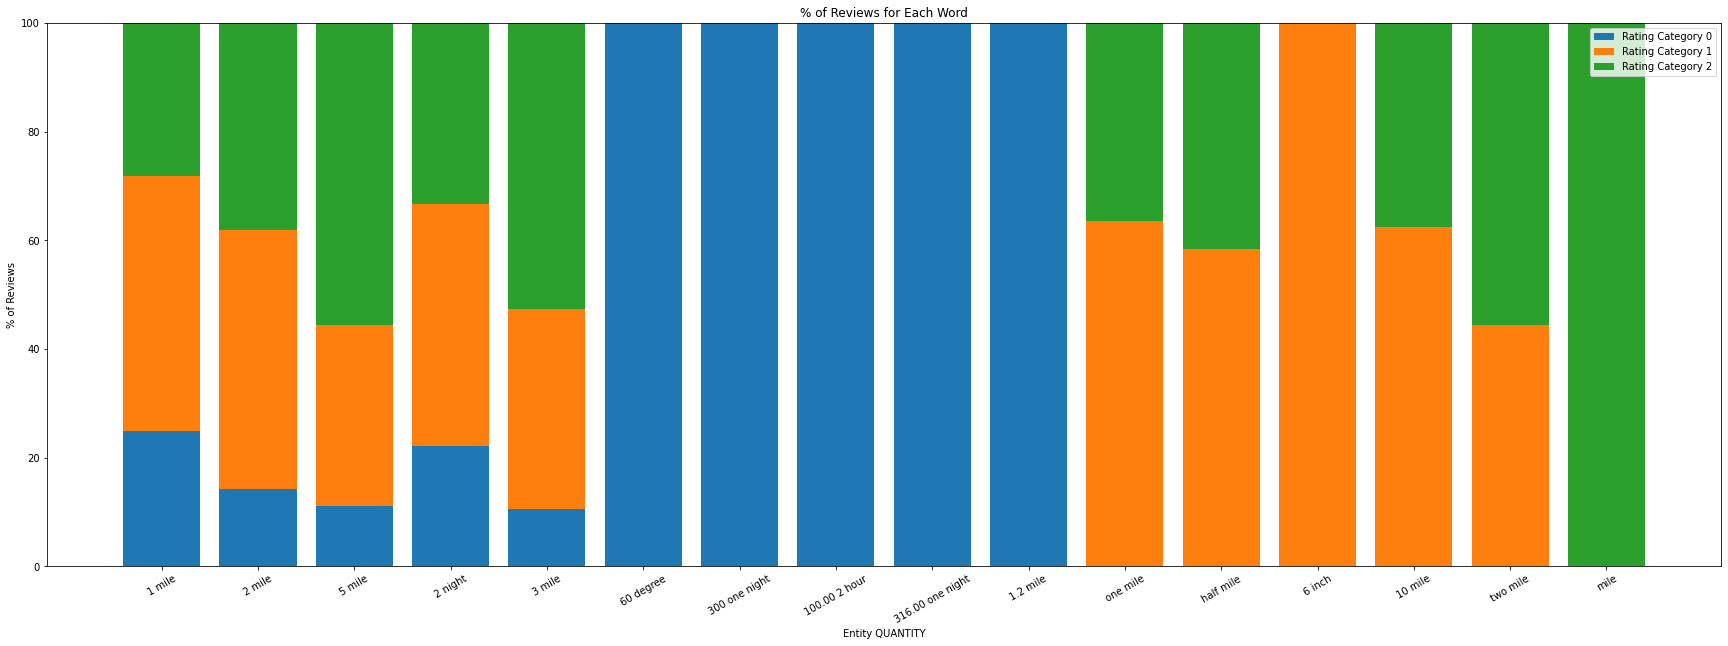

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))

ax.bar(QTY_all_2['index'], QTY_all_2['cat_0'], label="Rating Category 0")
ax.bar(QTY_all_2['index'], QTY_all_2['cat_1'], bottom = QTY_all_2['cat_0'], label="Rating Category 1")
ax.bar(QTY_all_2['index'], QTY_all_2['cat_2'], bottom = QTY_all_2['cat_0'] + QTY_all_2['cat_1'], label="Rating Category 2")

ax.set_xlabel("Entity QUANTITY")
plt.xticks(rotation=30)
ax.set_ylabel("% of Reviews")
ax.set_title("% of Reviews for Each Word")
ax.legend()

plt.show()